In [20]:
import pandas as pd
import plotly.express as px

# Načítanie dát
df = pd.read_csv('data/NRSR2023_SK_tab04.csv')

# Výber potrebných stĺpcov
df = df[['Názov politického subjektu', 'Počet platných hlasov', 'Pridelené mandáty spolu', 'Počet kandidátov']]

# Usporiadanie podľa počtu hlasov
df = df.sort_values(by='Počet platných hlasov', ascending=False)

# Použitie palety Viridis
colors = px.colors.sequential.Viridis

# Farebný kľúč
color_map = {subjekt: colors[i % len(colors)] for i, subjekt in enumerate(df['Názov politického subjektu'])}

# Biele pozadie
background_color = "#FFFFFF"

# Stĺpcový graf - Počet mandátov
fig_bar = px.bar(df,
                 x='Názov politického subjektu',
                 y='Pridelené mandáty spolu',
                 hover_data={'Počet platných hlasov': True},
                 labels={'Pridelené mandáty spolu': 'Počet mandátov'},
                 title='Počet mandátov pre politické subjekty',
                 color='Názov politického subjektu',
                 color_discrete_map=color_map)

fig_bar.update_traces(marker=dict(line=dict(width=1, color='black')), opacity=0.9)
fig_bar.update_layout(yaxis_title="Počet mandátov",
                      plot_bgcolor=background_color,
                      paper_bgcolor=background_color)

# Koláčový graf
fig_pie = px.pie(df,
                 names='Názov politického subjektu',
                 values='Počet platných hlasov',
                 title='Percentuálne rozdelenie hlasov medzi subjekty',
                 color='Názov politického subjektu',
                 color_discrete_map=color_map,
                 hole=0.4)

fig_pie.update_traces(
    textinfo='percent+label',
    hoverinfo='label+percent+value',
    pull=[0.1 if x == df['Názov politického subjektu'].iloc[0] else 0 for x in df['Názov politického subjektu']]
)

fig_pie.update_layout(plot_bgcolor=background_color,
                      paper_bgcolor=background_color)

# Scatter plot - Porovnanie hlasov a mandátov
fig_scatter = px.scatter(df,
                         x='Počet platných hlasov',
                         y='Pridelené mandáty spolu',
                         size='Počet kandidátov',
                         color='Názov politického subjektu',
                         title='Porovnanie počtu hlasov a získaných mandátov',
                         color_discrete_map=color_map,
                         hover_name='Názov politického subjektu')

fig_scatter.update_layout(xaxis_title="Počet platných hlasov",
                          yaxis_title="Počet mandátov",
                          plot_bgcolor=background_color,
                          paper_bgcolor=background_color)

# Zobrazenie grafov
fig_bar.show()
fig_pie.show()
fig_scatter.show()


In [21]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Načítanie údajov pre celé Slovensko
df_sr = pd.read_csv('data/NRSR2023_SK_tab07a.csv', usecols=['Názov politického subjektu', 'Počet platných prednostných hlasov']).copy()

# Agregácia počtu hlasov podľa politického subjektu
df_aggregated = df_sr.groupby('Názov politického subjektu', as_index=False).agg({'Počet platných prednostných hlasov': 'sum'})

# Získanie top 10 politických subjektov
top_10_subjekty = df_aggregated.sort_values(by='Počet platných prednostných hlasov', ascending=False).head(10)

# Použitie palety Viridis
colors = px.colors.sequential.Viridis

# Koláčový graf
fig_pie = px.pie(top_10_subjekty,
                 names='Názov politického subjektu',
                 values='Počet platných prednostných hlasov',
                 title='Podiel prednostných hlasov top 10 politických subjektov za celé Slovensko',
                 color='Názov politického subjektu',
                 hole=0.3,
                 color_discrete_sequence=colors)

fig_pie.update_layout(plot_bgcolor="white", paper_bgcolor="white")
fig_pie.show()

# Načítanie údajov pre kraje
df_kraje = pd.read_csv('data/NRSR2023_SK_tab07b.csv', usecols=['Názov kraja', 'Názov politického subjektu', 'Počet platných prednostných hlasov']).copy()

# Agregácia hlasov podľa kraja a politického subjektu
df_kraje_aggregated = df_kraje.groupby(['Názov kraja', 'Názov politického subjektu'], as_index=False).agg({'Počet platných prednostných hlasov': 'sum'})

df_sr_aggregated = df_kraje.groupby('Názov politického subjektu', as_index=False).agg({'Počet platných prednostných hlasov': 'sum'})

top_10_subjekty = df_sr_aggregated.sort_values(by='Počet platných prednostných hlasov', ascending=False).head(10)

df_kraje_top_10 = df_kraje_aggregated[df_kraje_aggregated['Názov politického subjektu'].isin(top_10_subjekty['Názov politického subjektu'])].copy()

# Agregácia hlasov podľa krajov
df_kraje_aggregated_by_total = df_kraje_top_10.groupby('Názov kraja', as_index=False).agg({'Počet platných prednostných hlasov': 'sum'})
df_kraje_aggregated_by_total = df_kraje_aggregated_by_total.sort_values(by='Počet platných prednostných hlasov', ascending=False)

# Udržanie správneho poradia politických subjektov
top_10_subjekty = top_10_subjekty.sort_values(by='Počet platných prednostných hlasov', ascending=True)

df_kraje_top_10['Názov kraja'] = pd.Categorical(
    df_kraje_top_10['Názov kraja'],
    categories=df_kraje_aggregated_by_total['Názov kraja'],
    ordered=True
)

df_kraje_top_10['Názov politického subjektu'] = pd.Categorical(
    df_kraje_top_10['Názov politického subjektu'],
    categories=top_10_subjekty['Názov politického subjektu'],
    ordered=True
)

df_kraje_top_10 = df_kraje_top_10.sort_values(by=['Názov kraja', 'Názov politického subjektu'], ascending=[True, False])

# Stĺpcový graf
fig_bar = px.bar(df_kraje_top_10,
                 x='Názov kraja',
                 y='Počet platných prednostných hlasov',
                 color='Názov politického subjektu',
                 title='Počet prednostných hlasov top 10 politických subjektov v jednotlivých krajoch',
                 color_discrete_sequence=colors,
                 barmode='stack')

fig_bar.update_layout(plot_bgcolor="white", paper_bgcolor="white")
fig_bar.show()


# Načítanie údajov pre celé Slovensko
df_sr = pd.read_csv('data/NRSR2023_SK_tab07a.csv', usecols=['Meno', 'Priezvisko', 'Názov politického subjektu', 'Počet platných prednostných hlasov']).copy()

# Agregácia počtu hlasov podľa kandidáta
df_sr['Celé meno'] = df_sr['Meno'] + ' ' + df_sr['Priezvisko']
df_candidates = df_sr.groupby(['Celé meno', 'Názov politického subjektu'], as_index=False).agg({'Počet platných prednostných hlasov': 'sum'})

# Získanie top 10 kandidátov
top_10_kandidati = df_candidates.sort_values(by='Počet platných prednostných hlasov', ascending=False).head(10)

# Použitie palety Viridis 
colors = px.colors.sequential.Viridis

# Tabuľka top 10 kandidátov
table_fig = go.Figure(data=[go.Table(
    header=dict(values=['Celé meno', 'Názov politického subjektu', 'Počet platných prednostných hlasov'],
                fill_color='purple',
                align='left',
                font=dict(color='white', size=15)),
    cells=dict(values=[top_10_kandidati['Celé meno'], top_10_kandidati['Názov politického subjektu'], top_10_kandidati['Počet platných prednostných hlasov']],
               fill_color='lavender',
               align='left',
               font=dict(color='black', size=14))
)])

# Nastavenie názvu tabuľky
table_fig.update_layout(
    title='Top 10 kandidátov podľa počtu prednostných hlasov za celé Slovensko',
    plot_bgcolor="white",
    paper_bgcolor="white"
)

# Zobrazenie tabuľky
table_fig.show()


Kraj s najvyššou účasťou: Bratislavský kraj (74.5%)
Kraj s najnižšou účasťou: Košický kraj (60.8%)


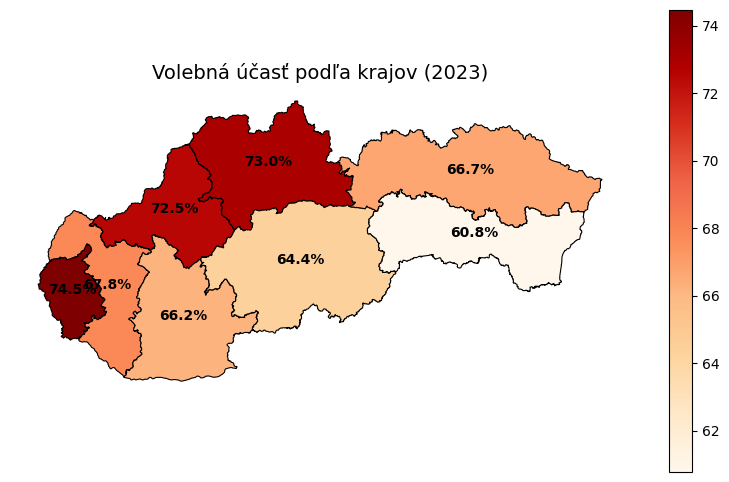

In [22]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Načítanie mapových údajov
slovakia_map = gpd.read_file("Slovakia.geojson")

# Použijeme stĺpec "NM4" ako názov kraja
slovakia_map.rename(columns={"NM4": "region"}, inplace=True)

# Načítanie volebných údajov
df = pd.read_csv("data/NRSR2023_SK_tab02a.csv")

# Uistíme sa, že názvy krajov sa zhodujú
df.rename(columns={"Názov kraja": "region"}, inplace=True)

# Spojenie volebných údajov s mapou
df_map = slovakia_map.merge(df, on="region", how="left")

# Získanie krajov s najväčšou a najmenšou účasťou
max_turnout_row = df_map.loc[df_map["Účasť voličov v %"].idxmax()]
min_turnout_row = df_map.loc[df_map["Účasť voličov v %"].idxmin()]

# Výpis informácií o krajoch s najvyššou a najnižšou účasťou
print(f"Kraj s najvyššou účasťou: {max_turnout_row['region']} ({max_turnout_row['Účasť voličov v %']:.1f}%)")
print(f"Kraj s najnižšou účasťou: {min_turnout_row['region']} ({min_turnout_row['Účasť voličov v %']:.1f}%)")

# Vytvorenie mapy
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
df_map.plot(column="Účasť voličov v %", cmap="OrRd", linewidth=0.8, edgecolor="black", legend=True, ax=ax)

# Pridanie názvov a hodnôt volebných účastí
for idx, row in df_map.iterrows():
    if row["geometry"] is not None:  # Kontrola, či existuje geometria
        centroid = row.geometry.centroid
        ax.annotate(text=f"{row['Účasť voličov v %']:.1f}%", xy=(centroid.x, centroid.y),
                    horizontalalignment='center', fontsize=10, fontweight="bold", color="black")

ax.set_title("Volebná účasť podľa krajov (2023)", fontsize=14)
ax.axis("off")

# Zobrazenie mapy
plt.show()


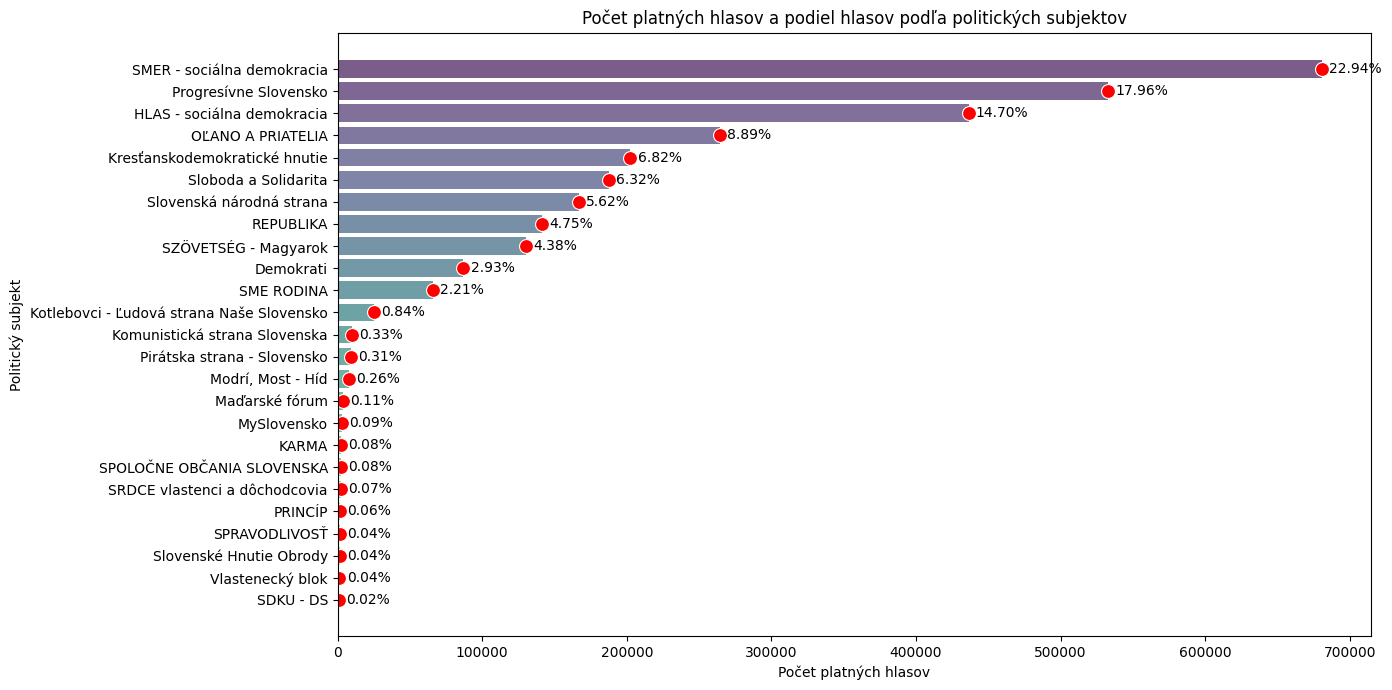

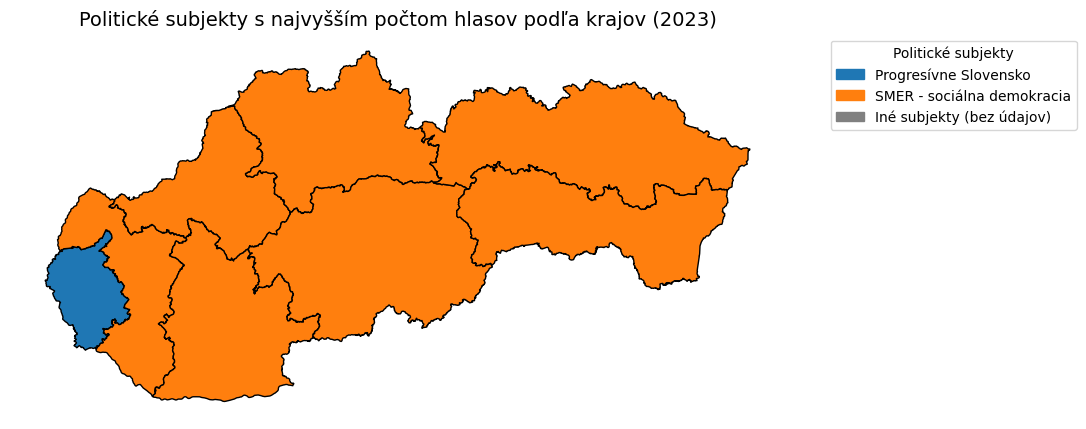

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import matplotlib.colors as mcolors
import seaborn as sns

# Načítanie volebných údajov
data = pd.read_csv("data/NRSR2023_SK_tab03a.csv")
df = pd.DataFrame(data)

# Zoradenie dát podľa počtu platných hlasov zostupne
df = df.sort_values(by="Počet platných hlasov", ascending=False)

# Kombinovaný stĺpcový a bodový graf pre všetky politické subjekty
plt.figure(figsize=(14, 7))
sns.barplot(y=df["Názov politického subjektu"], x=df["Počet platných hlasov"], hue=df["Názov politického subjektu"], palette="viridis", alpha=0.7, legend=False)
sns.scatterplot(y=df["Názov politického subjektu"], x=df["Počet platných hlasov"], color="red", s=100)

# Pridanie popisov hodnôt do grafu
for index, value in enumerate(df["Počet platných hlasov"]):
    plt.text(value + 5000, index, f'{df["Podiel platných hlasov v %"].iloc[index]:.2f}%', color='black', va="center")

plt.xlabel("Počet platných hlasov")
plt.ylabel("Politický subjekt")
plt.title("Počet platných hlasov a podiel hlasov podľa politických subjektov")
plt.tight_layout()
plt.show()


# Načítanie mapy Slovenska a premenovanie stĺpca
slovakia_map = gpd.read_file("Slovakia.geojson")
slovakia_map = slovakia_map.rename(columns={"NM4": "region"})

# Načítanie volebných dát a úprava názvu stĺpca
df = pd.read_csv("data/NRSR2023_SK_tab03b.csv")
df = df.rename(columns={"Názov kraja": "region"})

# Výber subjektu s najvyšším počtom platných hlasov v každom kraji
df_max_votes = df.loc[df.groupby("region")["Počet platných hlasov"].idxmax()]

# Spojenie mapy s volebnými údajmi podľa regiónu
df_map = slovakia_map.merge(df_max_votes, on="region", how="left")

# Vytvorenie slovníka farieb pre politické subjekty
unique_parties = df_map['Názov politického subjektu'].dropna().unique()
party_colors = dict(zip(unique_parties, mcolors.TABLEAU_COLORS.values()))

# Priradenie farieb ku krajom, ktoré majú volebný subjekt
df_map['color'] = df_map['Názov politického subjektu'].map(party_colors).fillna("gray")

# Vykreslenie mapy s farebným vyznačením
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
df_map.plot(ax=ax, color=df_map['color'], edgecolor='black', legend=False)

# Vytvorenie legendy s farbami politických subjektov
legend_handles = [patches.Patch(color=color, label=label) for label, color in party_colors.items()]
legend_handles.append(patches.Patch(color="gray", label="Iné subjekty (bez údajov)"))

# Pridanie legendy a úprava zobrazenia mapy
ax.legend(handles=legend_handles, title="Politické subjekty", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title("Politické subjekty s najvyšším počtom hlasov podľa krajov (2023)", fontsize=14)
ax.axis("off")

plt.show()



In [25]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Načítanie CSV s volebnými výsledkami
csv_path = "data/NRSR2023_SK_tab03b.csv"  
data = pd.read_csv(csv_path)

# Načítanie GeoJSON súboru s hranicami krajov Slovenska
geojson_path = "Slovakia.geojson"  
geo_data = gpd.read_file(geojson_path)

# Premenovanie stĺpcov pre správne zlúčenie
geo_data = geo_data.rename(columns={"NM4": "Názov kraja"})
data["Podiel platných hlasov v %"] = data["Podiel platných hlasov v %"].astype(str).str.replace(",", ".").astype(float)

# Získanie zoznamu politických subjektov
subjekty = sorted(data["Názov politického subjektu"].unique())

# Widget na výber politického subjektu 
subjekt_dropdown = widgets.Dropdown(
    options=subjekty,
    description='Subjekt:',
    style={'description_width': 'initial'}
)

# Zobrazenie mapy
def zobraz_mapu(subjekt):
    df_filtered = data[data["Názov politického subjektu"] == subjekt]
    
    geo_merged = geo_data.merge(df_filtered, on="Názov kraja", how="left")
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    geo_merged.plot(column="Podiel platných hlasov v %", ax=ax, legend=True,
                    legend_kwds={'label': "Podpora subjektu v %", 'orientation': "horizontal"},
                    cmap="coolwarm", edgecolor="black")

    for _, row in geo_merged.iterrows():
        if not pd.isna(row["Podiel platných hlasov v %"]):  # Ak existujú dáta
            ax.annotate(f"{row['Podiel platných hlasov v %']:.1f}%",
                        xy=(row["geometry"].centroid.x, row["geometry"].centroid.y),
                        xytext=(5, 5), textcoords="offset points", ha='center', fontsize=8, color="black")

    plt.title(f"Podpora politického subjektu: {subjekt}")
    plt.show()

# Zobrazenie widgetu a interaktivity 
widgets.interactive(zobraz_mapu, subjekt=subjekt_dropdown)


interactive(children=(Dropdown(description='Subjekt:', options=('Demokrati', 'HLAS - sociálna demokracia', 'KA…